In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

In [3]:
#if you want to download the reference
import gdown
from zipfile import ZipFile

def download_and_unzip(url, path):
    print(f"Downloading and unzipping file...", end="")
    gdown.download(url, output=path, quiet=False)
    try:
        with ZipFile(path) as z:
            z.testzip()  # Check if the zip file is valid
            z.extractall(os.path.split(path)[0])
        print("Done")
    except Exception as e:
        print("Invalid file:", e)

url = r"https://drive.google.com/file/d/1odumtQBjr6H5yCssPeRg1PQ7OkMO9OKo/view?usp=sharing"
path = os.path.join(os.getcwd(), "ex_docs.zip")
if not os.path.exists(path):
    download_and_unzip(url, path)

In [11]:
ref_filename=r"C:\Users\dhika\Downloads\trial_docs\ex_docs\scanned_form.jpg"
print("reading reference",ref_filename)
im1=cv2.imread(ref_filename,cv2.IMREAD_COLOR)
im1=cv2.cvtColor(im1,cv2.COLOR_BGR2RGB)

im_filename=r"C:\Users\dhika\Downloads\trial_docs\ex_docs\to_aligned_form.jpg"
print("Image to be alligned",im_filename)
im2=cv2.imread(im_filename,cv2.IMREAD_COLOR)
im2=cv2.cvtColor(im2,cv2.COLOR_BGR2RGB)

reading reference C:\Users\dhika\Downloads\trial_docs\ex_docs\scanned_form.jpg
Image to be alligned C:\Users\dhika\Downloads\trial_docs\ex_docs\to_aligned_form.jpg


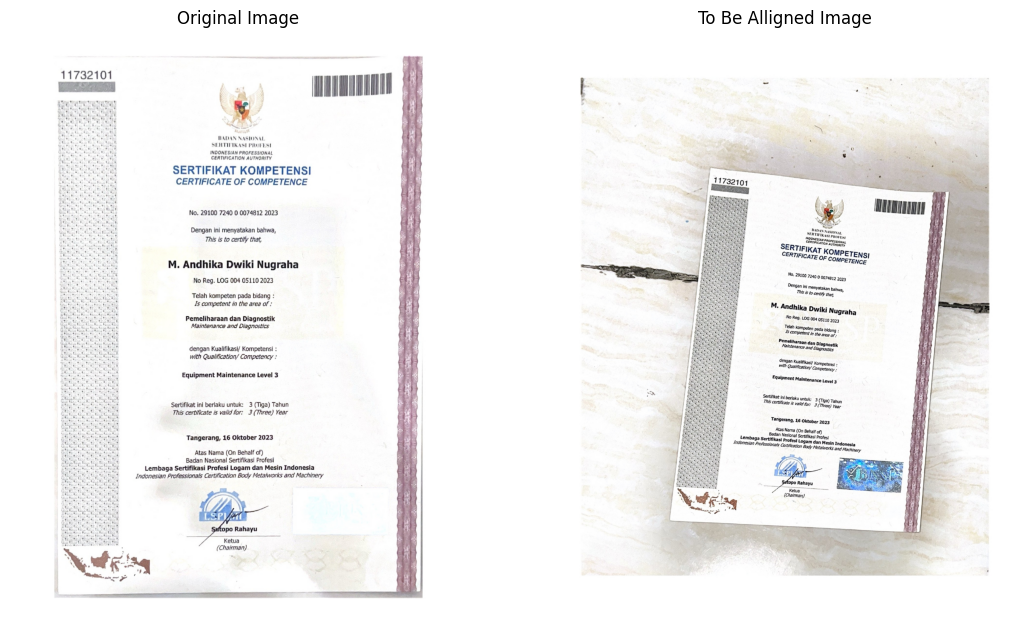

In [12]:
plt.figure(figsize=[20,10])
plt.subplot(131);plt.axis('off');plt.imshow(im1);plt.title("Original Image");
plt.subplot(132);plt.axis('off');plt.imshow(im2);plt.title("To Be Alligned Image");

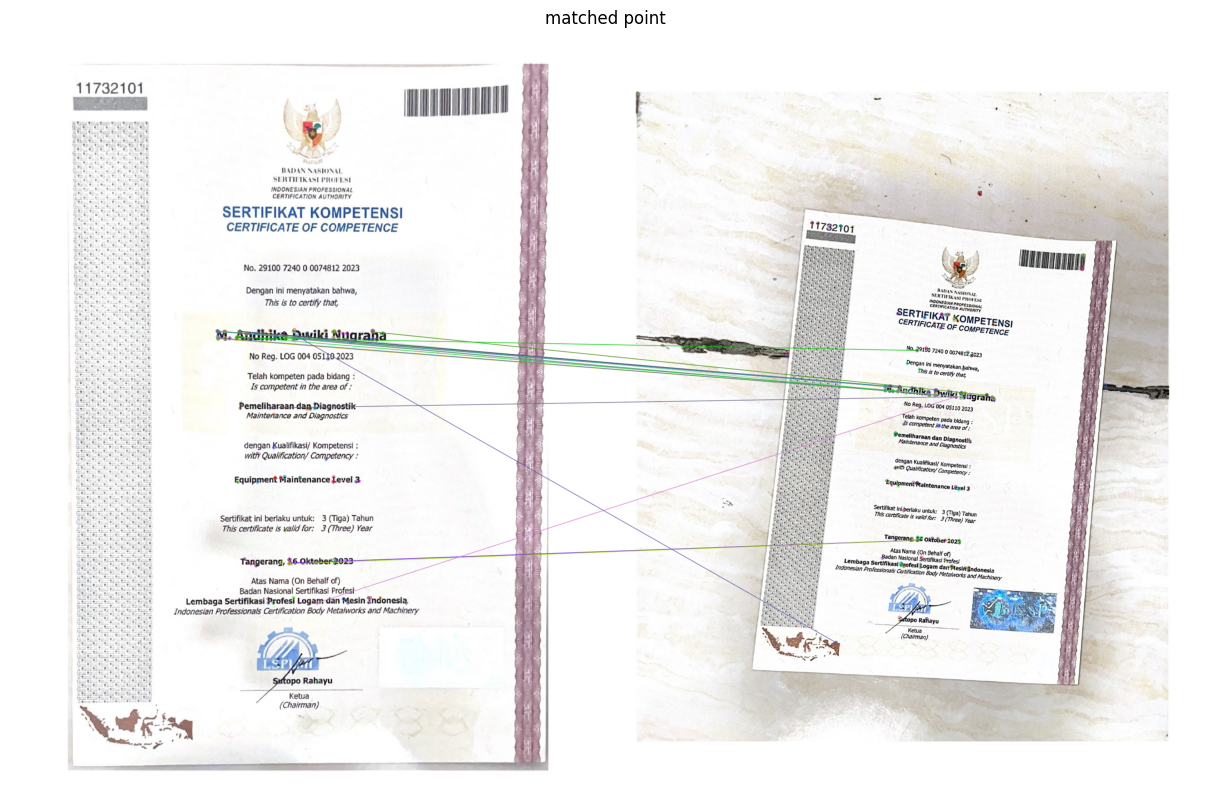

In [24]:
#Role of cv2.getPerspectiveTransform is for computes homography matrix from corresponding points
im_matched = cv2.drawMatches (im1,keypoint1,im2,keypoint2,matches,None)
plt.figure(figsize=[40,10])
plt.imshow(im_matched);plt.axis('off');plt.title('matched point');

In [43]:
point1=np.zeros((len(matches), 2),dtype = np.float32)
point2=np.zeros((len(matches), 2),dtype = np.float32)
for i, match in enumerate(matches):
    point1[i,:] = keypoint1[match.queryIdx].pt
    point2[i,:] = keypoint2[match.trainIdx].pt
h,mask = cv2.findHomography (point2,point1,cv2.RANSAC)

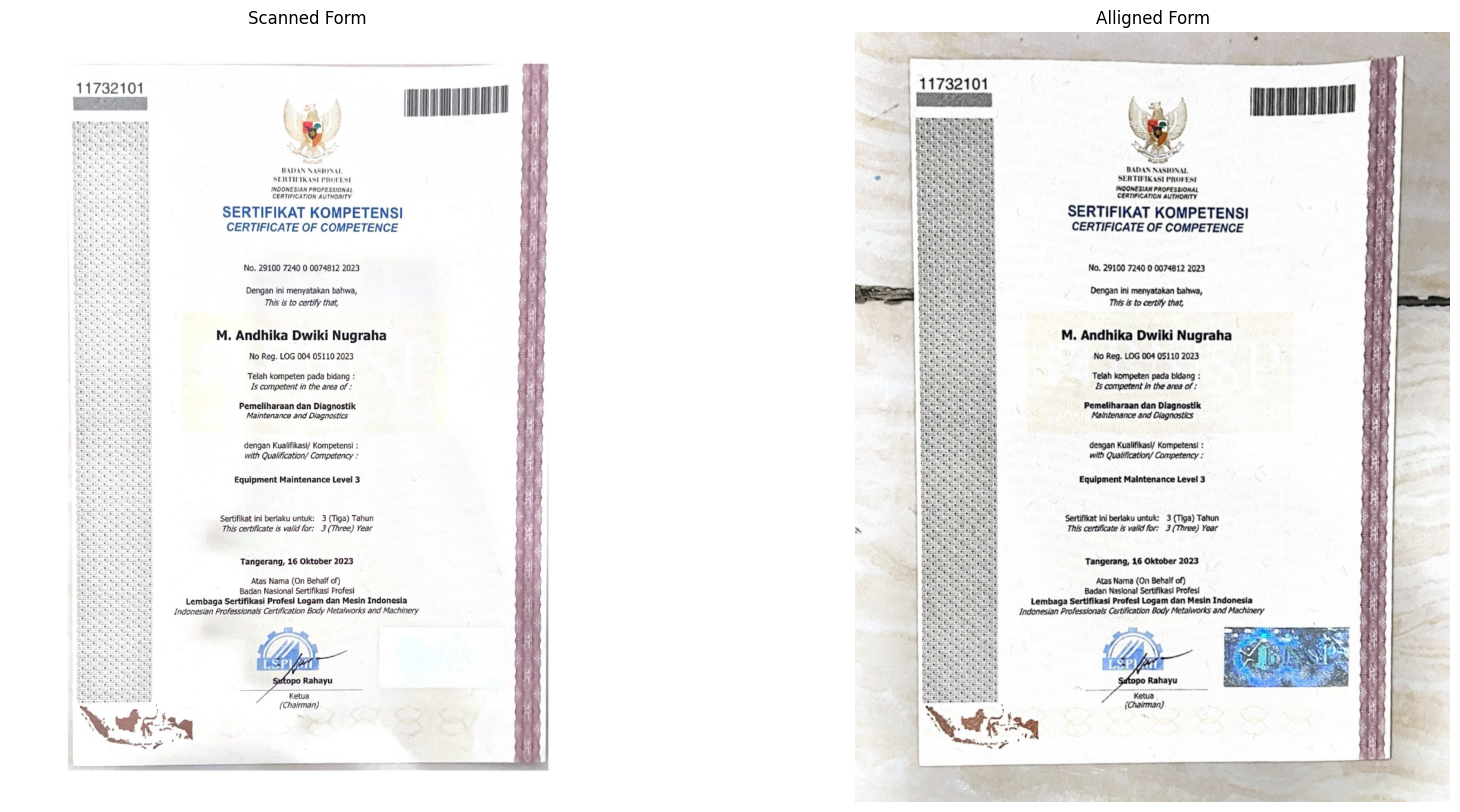

In [44]:
height, width, channels = im1.shape
im2_reg = cv2.warpPerspective (im2,h,(width,height))
plt.figure(figsize=[20,10])
plt.subplot(121);plt.imshow(im1);plt.axis('off');plt.title('Scanned Form');
plt.subplot(122);plt.imshow(im2_reg);plt.axis('off');plt.title('Alligned Form');

In [47]:
ref_filename=r"C:\Users\dhika\Downloads\trial_docs\ex_docs\scanned_form.jpg"
print("reading reference",ref_filename)
im1=cv2.imread(ref_filename,cv2.IMREAD_COLOR)
im1=cv2.cvtColor(im1,cv2.COLOR_BGR2RGB)

im_filename=r"C:\Users\dhika\Downloads\trial_docs\ex_docs\to_align_doc_page.jpg"
print("Image to be alligned",im_filename)
im2=cv2.imread(im_filename,cv2.IMREAD_COLOR)
im2=cv2.cvtColor(im2,cv2.COLOR_BGR2RGB)

reading reference C:\Users\dhika\Downloads\trial_docs\ex_docs\scanned_form.jpg
Image to be alligned C:\Users\dhika\Downloads\trial_docs\ex_docs\to_align_doc_page.jpg


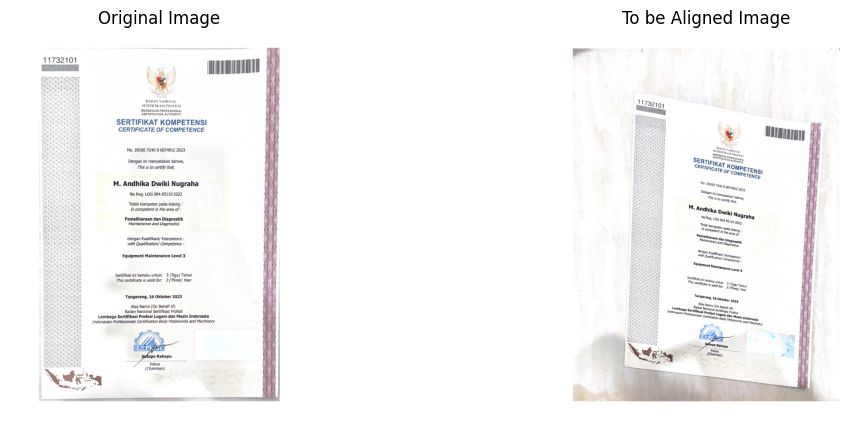

In [48]:
plt.figure(figsize=[20,5])
plt.subplot(131);plt.axis('off');plt.imshow(im1);plt.title("Original Image"); #turnoff the axis measurement
plt.subplot(132);plt.axis('off');plt.imshow(im2);plt.title("To be Aligned Image");

In [55]:
#Keypoint in orb feature det is for point of interest in image that invariant to rotaion and scale and changes
im1_gray=cv2.cvtColor(im1,cv2.COLOR_BGR2GRAY)
im2_gray=cv2.cvtColor(im2,cv2.COLOR_BGR2GRAY)
MAX_NUM_FEATURES = 1000

#orb detect and computer is for specifies region of interest where keypoints should be detected
orb = cv2.ORB_create(MAX_NUM_FEATURES)
keypoint1,descriptor1=orb.detectAndCompute(im1_gray,None)
keypoint2,descriptor2=orb.detectAndCompute(im2_gray,None)

im1_display=cv2.drawKeypoints(im1,keypoint1,outImage=np.array([]),
                              color=(255,0,0),flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
im2_display=cv2.drawKeypoints(im2,keypoint2,outImage=np.array([]),
                              color=(255,0,0),flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


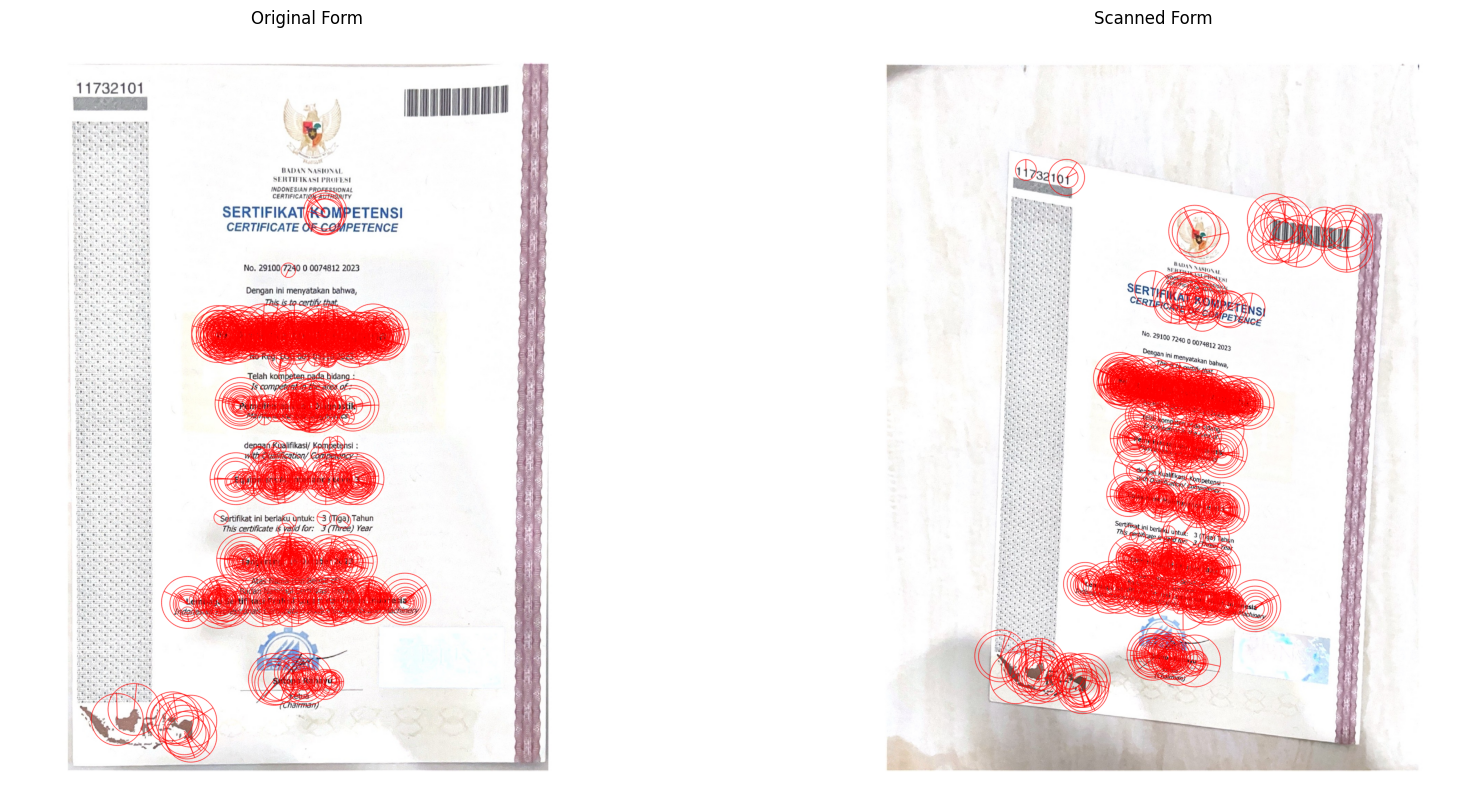

In [56]:
plt.figure(figsize=[20,10]) #central of circle and orientation represents the image path from key point (overlapping)
plt.subplot(121); plt.axis('off'); plt.imshow(im1_display); plt.title("Original Form");
plt.subplot(122); plt.axis('off'); plt.imshow(im2_display); plt.title("Scanned Form");

In [57]:
#Descriptor matcher used for matches feature between two image (if code 2 mean brute-force methode)
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
matches = list(matcher.match(descriptor1,descriptor2,None))
matches.sort(key=lambda x: x.distance, reverse=False)
numGoodMatches = int(len(matches) * 0.1)
matches = matches[:numGoodMatches]

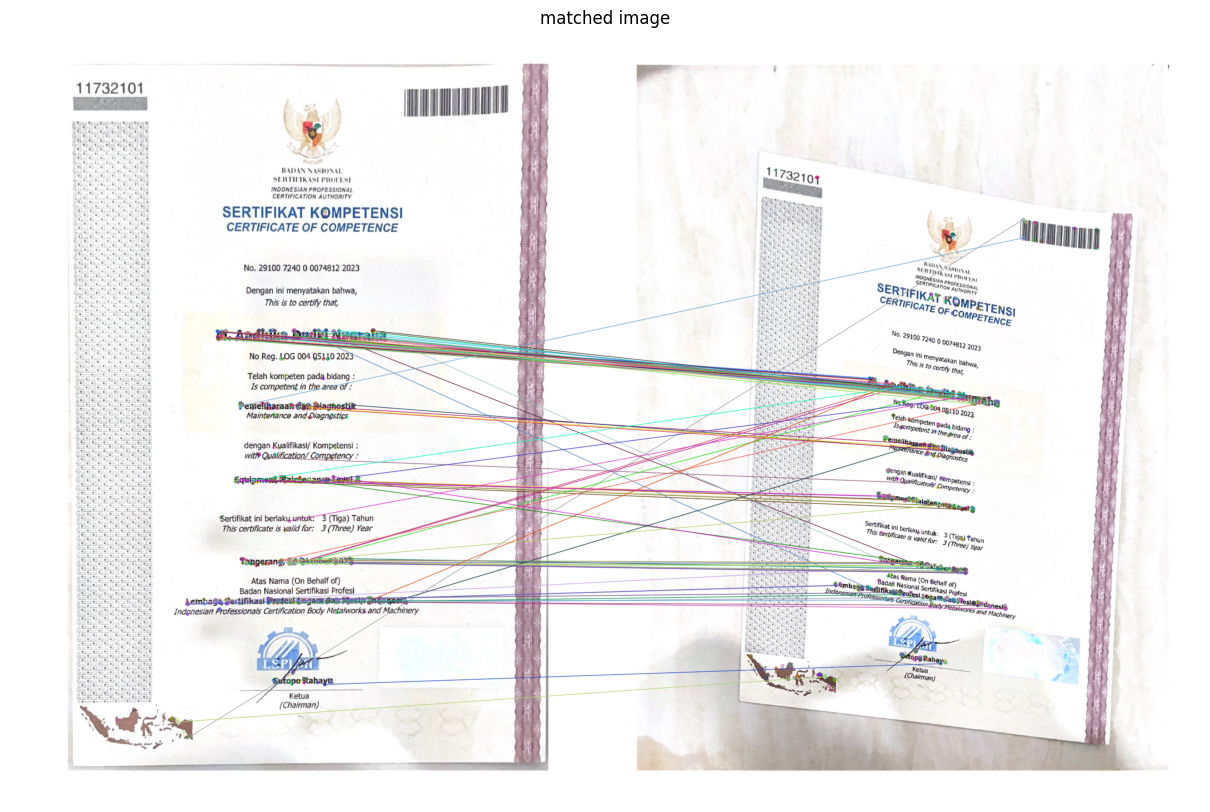

In [58]:
#Role of cv2.getPerspectiveTransform is for computes homography matrix from corresponding points
im_matched = cv2.drawMatches (im1,keypoint1,im2,keypoint2,matches,None)
plt.figure(figsize=[40,10])
plt.imshow(im_matched);plt.axis('off');plt.title('matched image');

In [59]:
point1=np.zeros((len(matches), 2),dtype = np.float32)
point2=np.zeros((len(matches), 2),dtype = np.float32)
for i, match in enumerate(matches):
    point1[i,:] = keypoint1[match.queryIdx].pt
    point2[i,:] = keypoint2[match.trainIdx].pt
h,mask = cv2.findHomography (point2,point1,cv2.RANSAC)

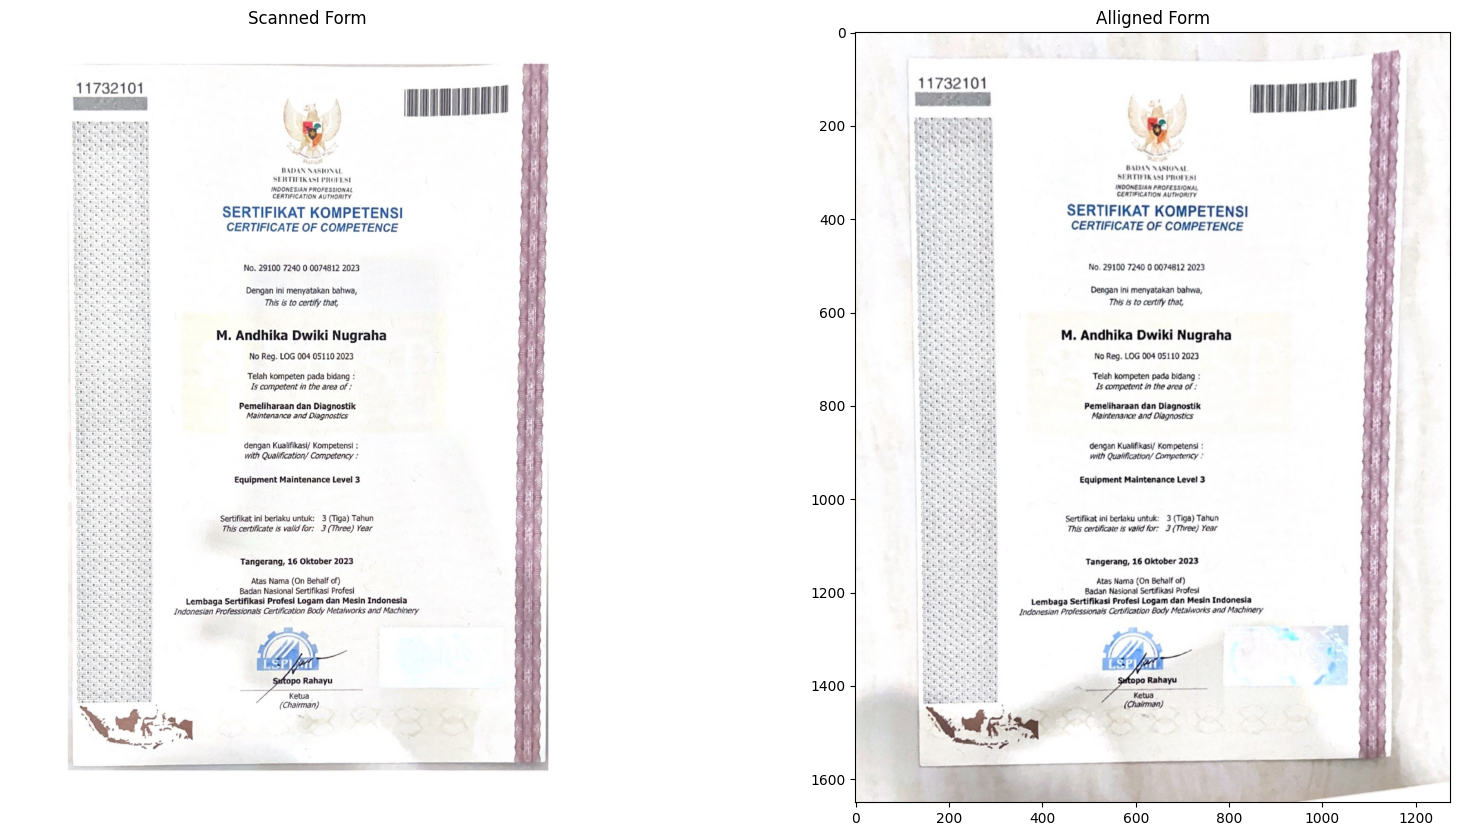

In [61]:
height, width, channels = im1.shape
im2_reg = cv2.warpPerspective (im2,h,(width,height))
plt.figure(figsize=[20,10])
plt.subplot(121);plt.imshow(im1);plt.axis('off');plt.title('Scanned Form');
plt.subplot(122);plt.imshow(im2_reg);plt.title('Alligned Form');

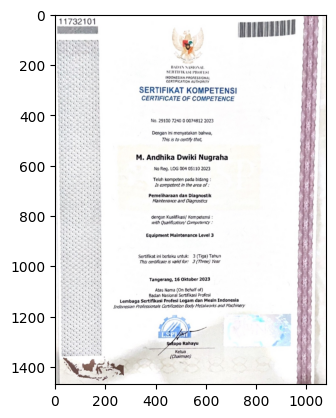

In [75]:
cropping_image = im2_reg [80:1550, 120:1200]
plt.imshow(cropping_image)

In [89]:
matrix = np.ones(cropping_image.shape, dtype="uint8") * 20
img_brighter = cv2.add (cropping_image,matrix)

In [103]:
# Perform adaptive thresholding for character recognition
cropping_image_gray = cv2.cvtColor(cropping_image, cv2.COLOR_BGR2GRAY)
img_thresh_adp = cv2.adaptiveThreshold(cropping_image_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 7)

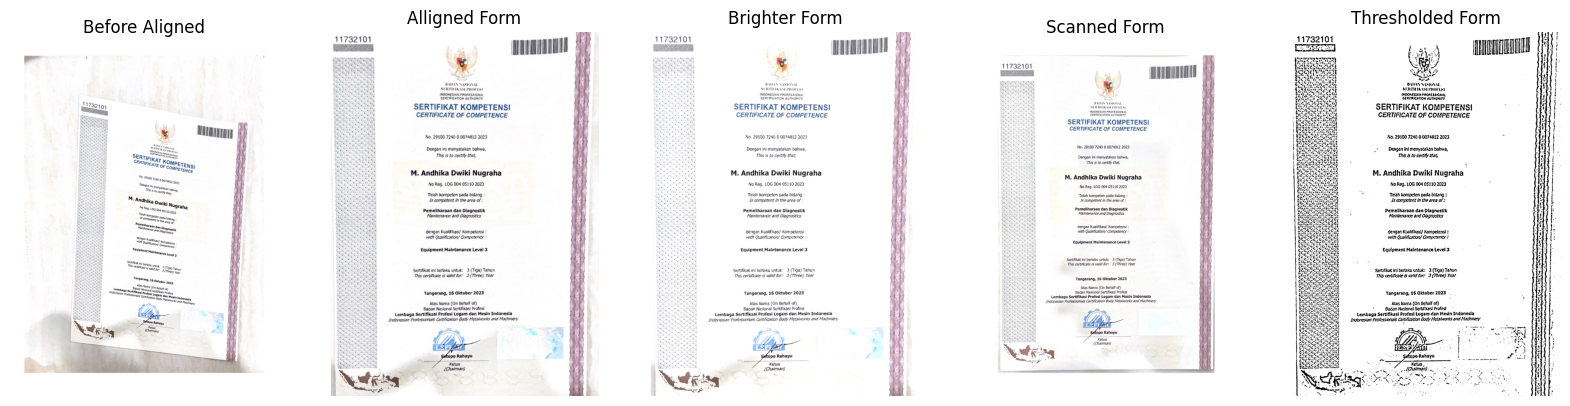

In [104]:
height, width, channels = im1.shape
plt.figure(figsize=[20,10])
plt.subplot(151);plt.imshow(im2);plt.axis('off');plt.title('Before Aligned');
plt.subplot(152);plt.imshow(cropping_image);plt.axis('off');plt.title('Alligned Form');
plt.subplot(153);plt.imshow(img_brighter);plt.axis('off');plt.title('Brighter Form');
plt.subplot(154);plt.imshow(im1);plt.axis('off');plt.title('Scanned Form');
plt.subplot(155);plt.imshow(img_thresh_adp,cmap='gray');plt.axis('off');plt.title('Thresholded Form');